In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

%matplotlib inline 

# Parameters
N=19

# Path to data
path='../data/Seed1/'

# names of cortical areas
areasName=['GU','SSp-un','VISC','MOp','PL','SSs','SSp-bfd','ACAd','RL','AL','DP','AUDpo','AM','V1','MM','LM','PM','RSPd','P']

# ticks
ticks=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,15.5,16.5,17.5,18.5]  

import matplotlib as mpl

mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['axes.spines.top'] = True

### Raster Plot

In [11]:
xValues=[]
yValues=[]
for i in range(19):
    spikeData=np.load(path+'Spikes_'+str(i+1)+'.npy')

    xValues.extend(spikeData[:,0])
    yValues.extend(spikeData[:,1])

# numpy array
spikeIdx=np.array(yValues)
spikeTime=np.array(xValues)

([<matplotlib.axis.XTick at 0x7fa7cb65f250>,
 [Text(20000, 0, ''),
  Text(20100, 0, ''),
  Text(20200, 0, ''),
  Text(20300, 0, ''),
  Text(20400, 0, ''),
  Text(20500, 0, '')])

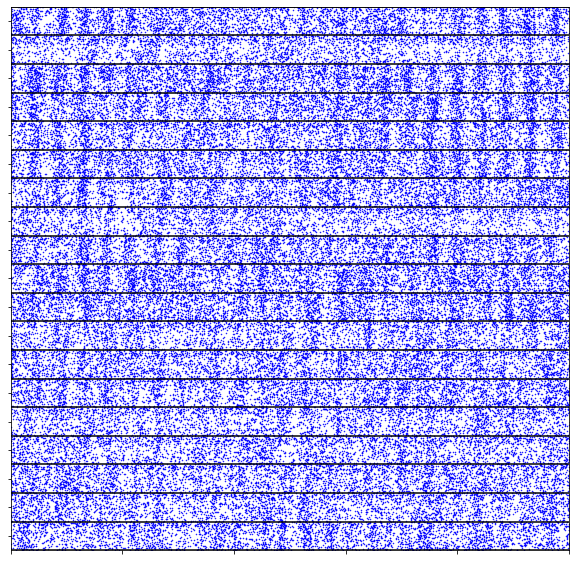

In [12]:
# Raster plot (500ms)
plt.figure(figsize=(10,10))
condition=(spikeTime>=20000) & (spikeTime<=21000)
plt.plot(spikeTime[condition],spikeIdx[condition]/2000,'b.',markersize=1)
plt.xlim([20000,20500])
plt.ylim([0,19])
plt.plot([20000,20500], np.arange(N+1).repeat(2).reshape(-1, 2).T, 'k-')
plt.yticks(ticks[:N],'')
plt.xticks([20000,20100,20200,20300,20400,20500],'')


### LFP


(-1.5, 1.5)

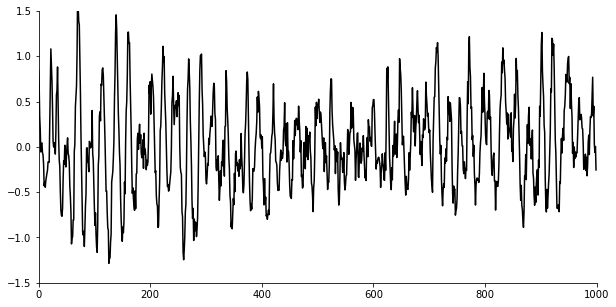

In [13]:
import matplotlib as mpl

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

#########################################
# LFP for node 3
#########################################

lfpData=np.load(path+'lfpDownsampled.npy')
lfpData=lfpData[3,:]
plt.figure(figsize=(10,5))
plt.plot(lfpData[1000:2000],'k') 
plt.xlim([0,1000])
plt.ylim([-1.5,1.5])


### PSD

(0.0, 0.016)

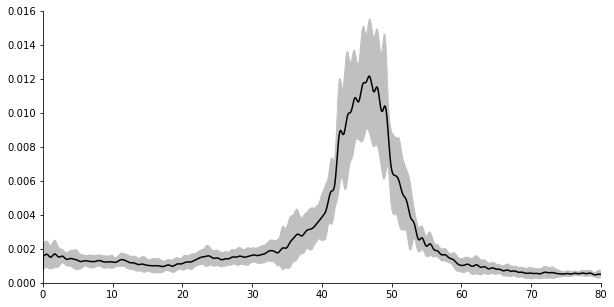

In [14]:
# Dados gerados em matlab
data = loadmat('../data/psd.mat')
plt.figure(figsize=(10,5))
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

frequency=np.squeeze(np.array(data['freq']))
meanValues=np.squeeze(np.array(data['meanPSD']))
stdValues=np.squeeze(np.array(data['stdPSD']))
plt.plot(frequency,meanValues , 'k-')
plt.fill_between(frequency, meanValues-stdValues, meanValues+stdValues,color='silver')
plt.xlim(0,80)
plt.ylim(0,0.0160)

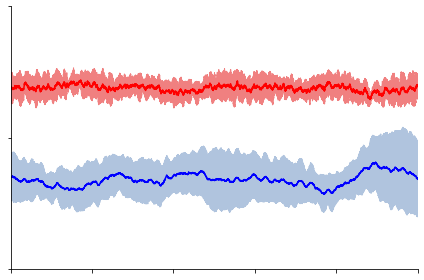

In [15]:
# Dados gerados em Python
# timefr,meanfrE,stdfrE,meanfrI,stdfrI
# Pega um segundo a frente porque não foi descontado transiente nos spikes

data = loadmat('../data/firingRate.mat')
plt.figure()
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

time=np.squeeze(np.array(data['time']))
meanValues=np.squeeze(np.array(data['frEmean']))
stdValues=np.squeeze(np.array(data['frEstd']))
plt.plot(time,meanValues , 'b-')
plt.fill_between(time, meanValues-stdValues, meanValues+stdValues,color='lightsteelblue')

meanValues=np.squeeze(np.array(data['frImean']))
stdValues=np.squeeze(np.array(data['frIstd']))
plt.plot(time,meanValues , 'r-')
plt.fill_between(time, meanValues-stdValues, meanValues+stdValues,color='lightcoral')
plt.xlim(2000,3000)
plt.ylim(2,6)
plt.yticks([2.0,4.0,6.0],'')
plt.xticks([2000,2200,2400,2600,2800,3000],'')
plt.tight_layout()
